In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
# plotly
# import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True) #offline modela ilgili
import plotly.graph_objs as go
# word cloud library
from wordcloud import WordCloud
# matplotlib
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import os

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
book_tags = pd.read_csv('drive/My Drive/book reco/book_tags.csv',encoding="Latin1")
books = pd.read_csv('drive/My Drive/book reco/books.csv', encoding="Latin1")
ratings = pd.read_csv('drive/My Drive/book reco/ratings.csv',encoding="Latin1")
tags = pd.read_csv('drive/My Drive/book reco/tags.csv', encoding="Latin1")
to_read = pd.read_csv('drive/My Drive/book reco/to_read.csv',encoding="Latin1")

In [ ]:
books.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPrÃ©",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,"Twilight (Twilight, #1)",en-US,3.57,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,To Kill a Mockingbird,eng,4.25,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,The Great Gatsby,eng,3.89,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [ ]:
books.shape
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         10000 non-null  int64  
 1   book_id                    10000 non-null  int64  
 2   best_book_id               10000 non-null  int64  
 3   work_id                    10000 non-null  int64  
 4   books_count                10000 non-null  int64  
 5   isbn                       9300 non-null   object 
 6   isbn13                     9415 non-null   float64
 7   authors                    10000 non-null  object 
 8   original_publication_year  9979 non-null   float64
 9   original_title             9415 non-null   object 
 10  title                      10000 non-null  object 
 11  language_code              8916 non-null   object 
 12  average_rating             10000 non-null  float64
 13  ratings_count              10000 non-null  int6

In [ ]:
books.describe()


,id,book_id,best_book_id,work_id,books_count,isbn13,original_publication_year,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5
count,10000.00000,1.000000e+04,1.000000e+04,1.000000e+04,10000.000000,9.415000e+03,9979.000000,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04
mean,5000.50000,5.264697e+06,5.471214e+06,8.646183e+06,75.712700,9.755044e+12,1981.987674,4.002191,5.400124e+04,5.968732e+04,2919.955300,1345.040600,3110.885000,11475.893800,1.996570e+04,2.378981e+04
std,2886.89568,7.575462e+06,7.827330e+06,1.175106e+07,170.470728,4.428619e+11,152.576665,0.254427,1.573700e+05,1.678038e+05,6124.378132,6635.626263,9717.123578,28546.449183,5.144736e+04,7.976889e+04
min,1.00000,1.000000e+00,1.000000e+00,8.700000e+01,1.000000,1.951703e+08,-1750.000000,2.470000,2.716000e+03,5.510000e+03,3.000000,11.000000,30.000000,323.000000,7.500000e+02,7.540000e+02
25%,2500.75000,4.627575e+04,4.791175e+04,1.008841e+06,23.000000,9.780316e+12,1990.000000,3.850000,1.356875e+04,1.543875e+04,694.000000,196.000000,656.000000,3112.000000,5.405750e+03,5.334000e+03
50%,5000.50000,3.949655e+05,4.251235e+05,2.719524e+06,40.000000,9.780452e+12,2004.000000,4.020000,2.115550e+04,2.383250e+04,1402.000000,391.000000,1163.000000,4894.000000,8.269500e+03,8.836000e+03
75%,7500.25000,9.382225e+06,9.636112e+06,1.451775e+07,67.000000,9.780831e+12,2011.000000,4.180000,4.105350e+04,4.591500e+04,2744.250000,885.000000,2353.250000,9287.000000,1.602350e+04,1.730450e+04
max,10000.00000,3.328864e+07,3.553423e+07,5.639960e+07,3455.000000,9.790008e+12,2017.000000,4.820000,4.780653e+06,4.942365e+06,155254.000000,456191.000000,436802.000000,793319.000000,1.481305e+06,3.011543e+06


In [ ]:
books['authors'].unique()


array(['Suzanne Collins', 'J.K. Rowling, Mary GrandPrÃ©',
       'Stephenie Meyer', ..., 'Ian Mortimer', 'Peggy Orenstein',
       'John Keegan'], dtype=object)

In [ ]:
books['language_code'].unique()

array(['eng', 'en-US', 'en-CA', nan, 'spa', 'en-GB', 'fre', 'nl', 'ara',
       'por', 'ger', 'nor', 'jpn', 'en', 'vie', 'ind', 'pol', 'tur',
       'dan', 'fil', 'ita', 'per', 'swe', 'rum', 'mul', 'rus'],
      dtype=object)

In [ ]:
books['average_rating'].sort_values(ascending=False)
books['authors'].value_counts(dropna=False)

Stephen King                                                                     60
Nora Roberts                                                                     59
Dean Koontz                                                                      47
Terry Pratchett                                                                  42
Agatha Christie                                                                  39
                                                                                 ..
Neil Gaiman, Jill Thompson, Vince Locke, Peter Straub                             1
Bill Willingham, Mark Buckingham, Steve Leialoha, Tony Akins, Jimmy Palmiotti     1
Dorie Greenspan, Alan    Richardson                                               1
Jeff Lemire, JosÃ© Villarrubia, Carlos M. Mangual                                 1
Mark Millar, Kilian Plunkett, Andrew Robinson, Walden Wong, Dave Johnson          1
Name: authors, Length: 4664, dtype: int64

In [ ]:
df = books.work_text_reviews_count>20000 #Considers books only with 20000+ text reviews
books_newdata2=books[df]
melted_books2= pd.melt(frame=books_newdata2,id_vars='authors',value_vars='work_text_reviews_count')
melted_books2.head()

,authors,variable,value
0,Suzanne Collins,work_text_reviews_count,155254
1,"J.K. Rowling, Mary GrandPrÃ©",work_text_reviews_count,75867
2,Stephenie Meyer,work_text_reviews_count,95009
3,Harper Lee,work_text_reviews_count,72586
4,F. Scott Fitzgerald,work_text_reviews_count,51992


In [ ]:
reviews_list= list(melted_books2['authors'].unique())

In [ ]:
author_reviews_ratio=[]

for i in reviews_list:
    x= melted_books2[melted_books2['authors']==i]
    author_reviews_ratio_rate=sum(x.value)/len(x)
    author_reviews_ratio.append(  author_reviews_ratio_rate)

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 156 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 129 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 134 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 133 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 136 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 140 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 156 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/bac

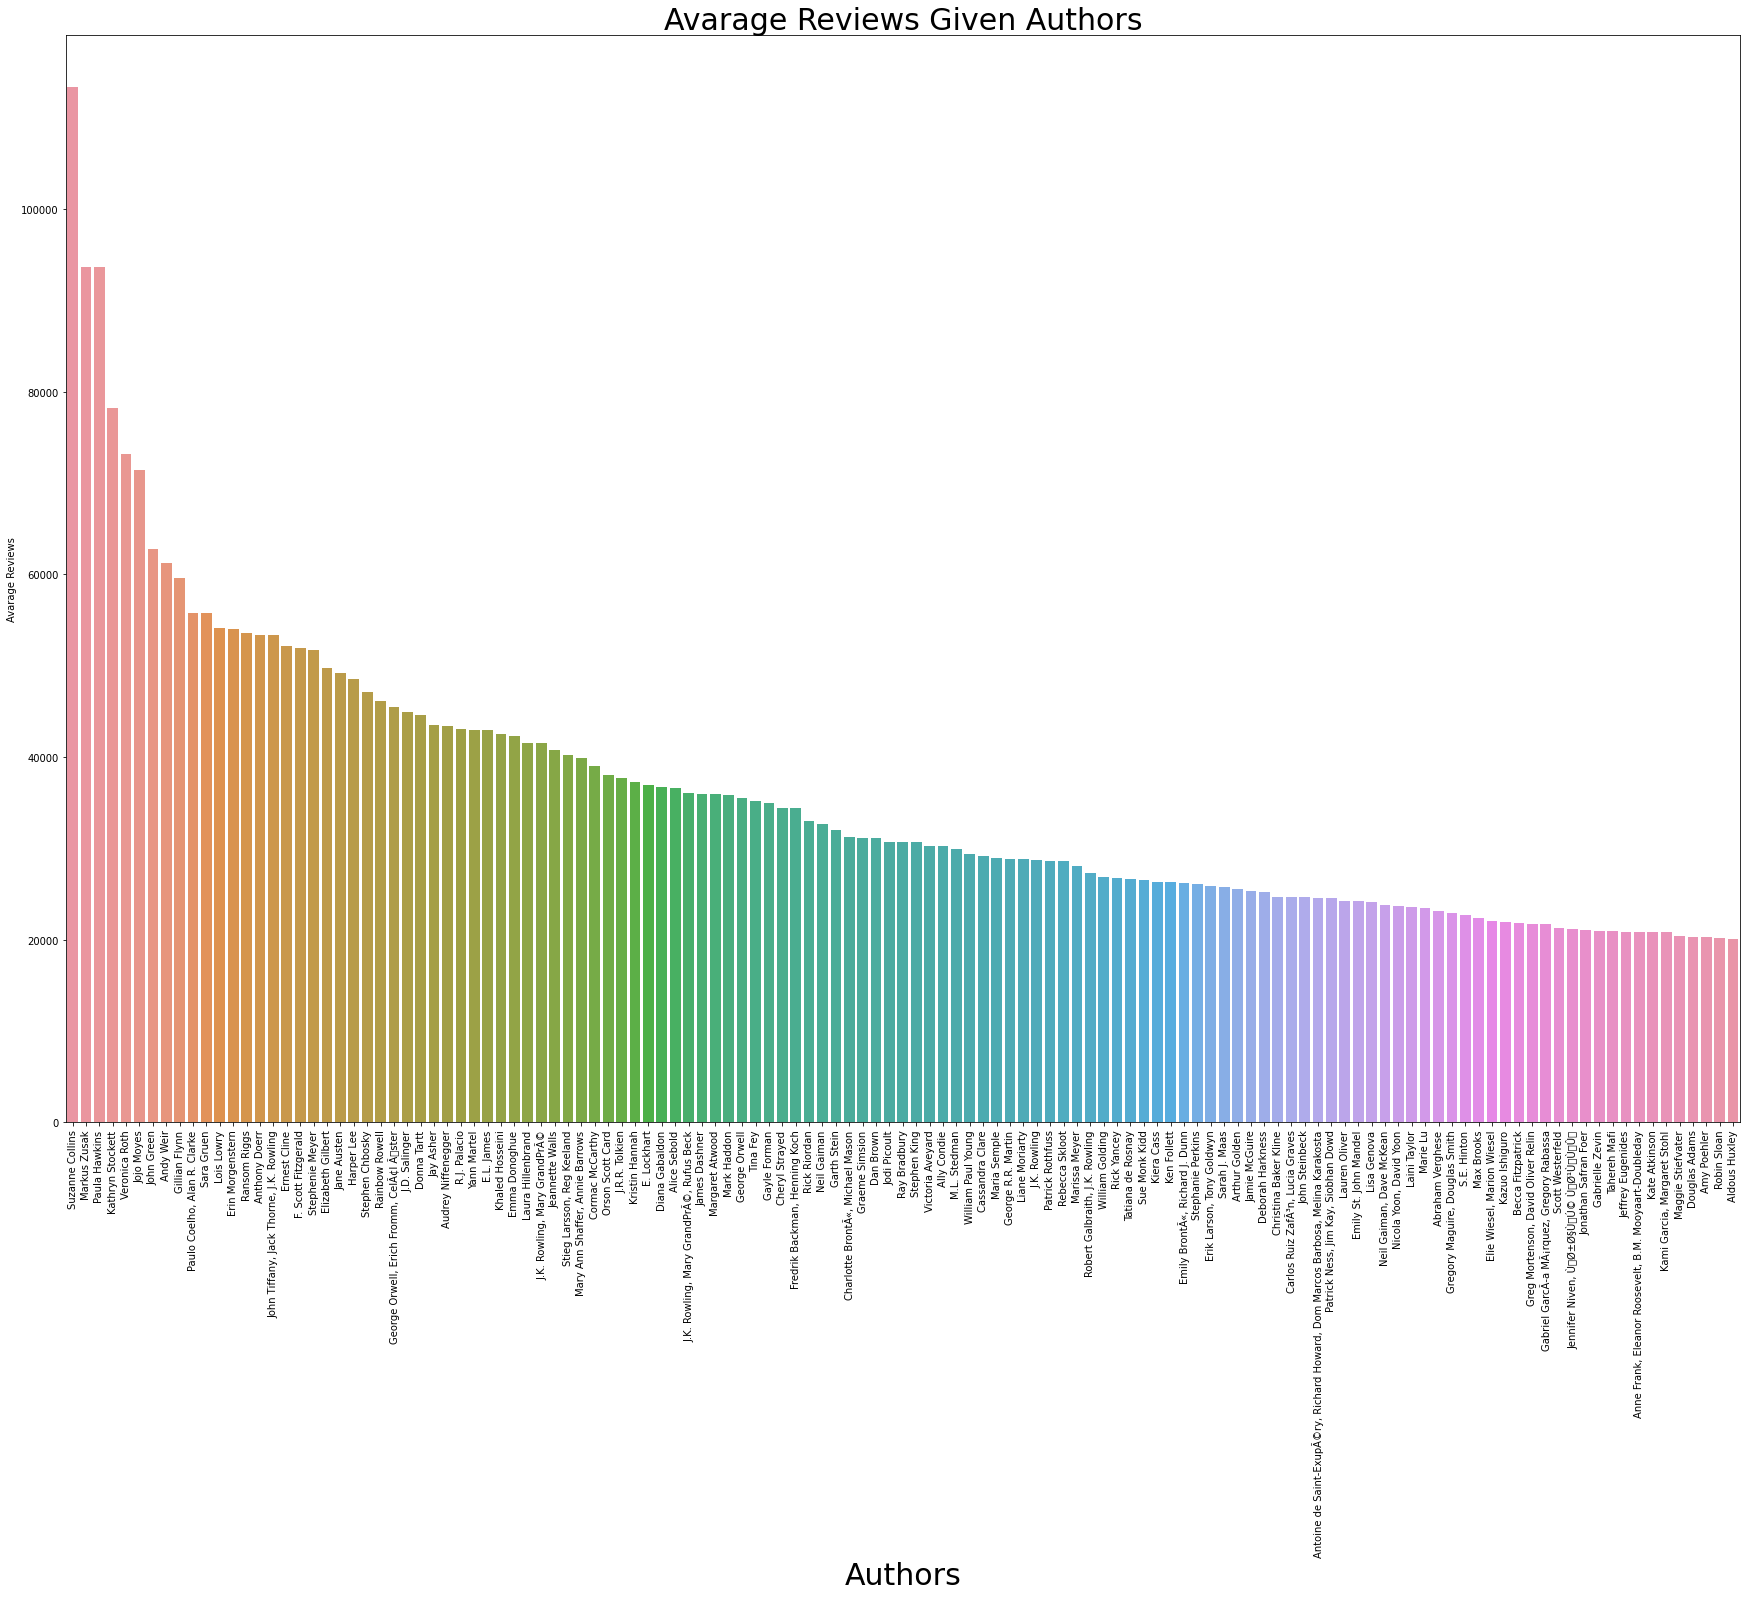

In [ ]:
data = pd.DataFrame({'reviews_list':reviews_list,'author_reviews_ratio':author_reviews_ratio})
new_index = (data['author_reviews_ratio'].sort_values(ascending=False)).index.values
sorted_data2 = data.reindex(new_index)

#visualization
plt.figure(figsize=(30,20))
sns.barplot(x=sorted_data2['reviews_list'],y=sorted_data2['author_reviews_ratio'])
plt.xticks(rotation= 90)
plt.xlabel('Authors',size='30')
plt.ylabel('Avarage Reviews')
plt.title('Avarage Reviews Given Authors',color='black',size='30')
plt.show()

In [ ]:
data1= books.head(20)
data1.rename(columns={'ratings_1':'R1', 'ratings_2':'R2','ratings_3':'R3','ratings_4':'R4','ratings_5':'R5'}, inplace=True)


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4133: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 156 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 156 missing from current font.



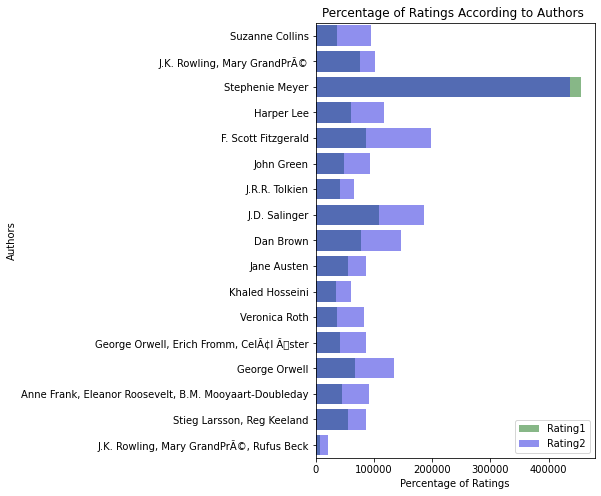

In [ ]:
author_list= list(data1['authors'].unique())

ratings1= []
ratings2= []
for i in author_list:
    
    x = data1[data1['authors']==i]
    ratings1.append(sum(x.R1)/len(x))
    ratings2.append(sum(x.R2)/len(x))
    
f,ax = plt.subplots(figsize = (5,8))
sns.barplot(x=ratings1,y=author_list,color='green',alpha = 0.5,label='Rating1' )
sns.barplot(x=ratings2,y=author_list,color='blue',alpha = 0.5,label='Rating2' )
ax.legend(loc='lower right',frameon = True)   
ax.set(xlabel='Percentage of Ratings', ylabel='Authors',title = "Percentage of Ratings According to Authors ")
plt.show()

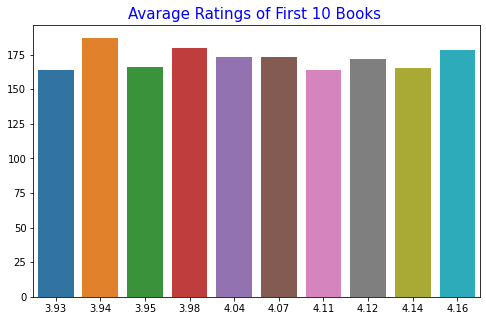

In [ ]:
data3=books.head(6)
sta = books.average_rating.value_counts().index[:10]  
plt.figure(figsize = (8,5))
sns.barplot(x=sta,y =books.average_rating.value_counts().values[:10]) 
plt.title('Avarage Ratings of First 10 Books ',color = 'blue',fontsize=15)
plt.show()